In [1]:
from __future__ import division
from IO import *
from cycler import cycler
import matplotlib as mpl
%matplotlib inline
from numba import autojit

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
# Instantiate classes
cortex = Cortex()
trn = TRN()
gr = GRAPH(cortex)

In [4]:
# #-------------------------------
# # PARAMS SEARCH
# #-------------------------------
c = cortex
c.N = 400
c.g = 10
c.d1 = 10
c.d2 = 30000
c.d3 = 10
c.initTime()
c.sigma = 60
c.WII = 1400 #2800
c.S = 100
c.model = "gp-izh-subnetworks"
c.glob = 0
c.plast = 1

# shared weights
c.sG = 10
c.sWII = 10

c.FACT = 1
c.r=0

c.ratio = 15
c.LTD  = 1e-0*4.7e-6 * c.FACT * c.N
c.LTP = c.ratio * c.LTD
c.dt = 0.25
c.tauv=15

c.with_currents = True

sWIIList = [0,10]
sGList = [0,1,5,10,15,20,25]
sGList = np.arange(0,25,4)
LTDList = [1e-9*4.7e-6 * c.FACT * c.N, 1e-0*4.7e-6 * c.FACT * c.N]
taulist = np.arange(11,95,4)
workstation = True

In [5]:
# c.runSimulation()

In [24]:
mat = np.array(c.readMatrix(workstation=workstation))
matN1 = mat[0:(c.N - c.sG) // 2 - 1, 0:(c.N - c.sG) // 2 - 1]
np.nonzero(matN1)

(array([  0,   0,   0, ..., 184, 184, 184]),
 array([  1,   2,   3, ..., 181, 182, 183]))

15 10 28


[15,
 30000,
 10,
 28,
 False,
 339.19827844809788,
 10,
 400.68158382647806,
 10,
 39.960039960039957,
 27.572008350072664,
 39.960039960039957,
 27.140685558215786,
 39.960039960039957,
 28.517738969282583,
 39.960039960039957,
 28.730863137204533,
 39.960039960039957,
 33.374707544866638,
 39.960039960039957,
 34.637820204577736,
 0.012618551381075205,
 0.012805904212690953,
 0.010831023250461539,
 0.012618551381075205,
 0.012805904212690953,
 0.010831023250461539,
 2]

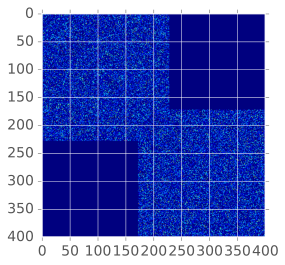

In [27]:
c.LTD = LTDList[0]
c.LTP = c.ratio * c.LTD
c.sG =28
c.readSimulation(workstation=workstation)
plt.imshow(c.readMatrix(workstation=workstation))
c.readToCSV(i=0, filename="data.csv", tauv=c.tauv, sWII=c.sWII, 
            LTD=c.LTD, LTP=c.LTP, sG=c.sG, save=False, workstation=workstation)

15 10 28


[15,
 30000,
 10,
 28,
 True,
 135.3061571504162,
 11,
 126.49945026568695,
 11,
 43.956043956043956,
 24.496486893092772,
 43.956043956043956,
 23.398286519289027,
 43.956043956043956,
 24.272123563545822,
 43.956043956043956,
 24.581792473101821,
 43.956043956043956,
 29.968140316477857,
 43.956043956043956,
 30.448383062472608,
 0.012709839174471211,
 0.012634653456962398,
 0.011732686113230769,
 0.011091768361927145,
 0.011217737600470035,
 0.013026971692307694,
 2]

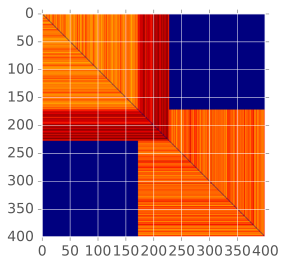

In [28]:
c.LTD = LTDList[1]
c.LTP = c.ratio * c.LTD
c.sG = 28
c.readSimulation(workstation=workstation)
plt.imshow(c.readMatrix(workstation=workstation))
c.readToCSV(i=0, filename="data.csv", tauv=c.tauv, sWII=c.sWII, 
            LTD=c.LTD, LTP=c.LTP, sG=c.sG, save=False, workstation=workstation)

In [33]:
today = datetime.date.today()
'%04d%02d%02d_%02d' % (today.year, today.month, today.day, today.hour)

AttributeError: 'datetime.date' object has no attribute 'hour'

In [53]:
'%d'%t.time()

'1467737268'